In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/MyDrive/capstone_final_preprocessed_data.csv')

In [12]:
data=data.drop('Unnamed: 0',axis=1)

In [13]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign__erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,6.0,11/03/2016,4000.0,4000.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign__erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,7.0,12/03/2017,1.0,500.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201611072166,8,otc_alterations_permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1_family_dwelling,1.0,1_family_dwelling,1.0,2.0,5.0,wood_frame_5,5.0,wood_frame_5,3.0,nob_hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
3,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,3.0,12/01/2018,100000.0,100000.0,retail_sales,1.0,retail_sales,1.0,2.0,3.0,constr_type_3,3.0,constr_type_3,6.0,tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
4,201706149344,8,otc_alterations_permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr_type_1,1.0,constr_type_1,10.0,potrero_hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [14]:
model_df=data[['Permit Type','Current Status','Number of Existing Stories',
       'Number of Proposed Stories','Revised Cost','Existing Units' ,'Proposed Units','Plansets','Proposed Construction Type',
       'Existing Construction Type','Supervisor District','Zipcode','Estimated Cost']]

In [15]:
model_df.head()

,Permit Type,Current Status,Number of Existing Stories,Number of Proposed Stories,Revised Cost,Existing Units,Proposed Units,Plansets,Proposed Construction Type,Existing Construction Type,Supervisor District,Zipcode,Estimated Cost
0,4,expired,6.0,6.0,4000.0,143.0,143.0,2.0,3.0,3.0,3.0,94102.0,4000.0
1,4,issued,7.0,7.0,500.0,143.0,143.0,2.0,3.0,3.0,3.0,94102.0,1.0
2,8,complete,2.0,2.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0,94109.0,2000.0
3,6,issued,3.0,3.0,100000.0,1.0,1.0,2.0,3.0,3.0,6.0,94102.0,100000.0
4,8,issued,5.0,5.0,4000.0,326.0,326.0,2.0,1.0,1.0,10.0,94107.0,4000.0


encoding current status

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
model_df['Current Status']=le.fit_transform(model_df['Current Status'])

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

In [18]:
features = model_df.drop(['Permit Type'],axis=1)
target = model_df['Permit Type']
selection.fit(features,target)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

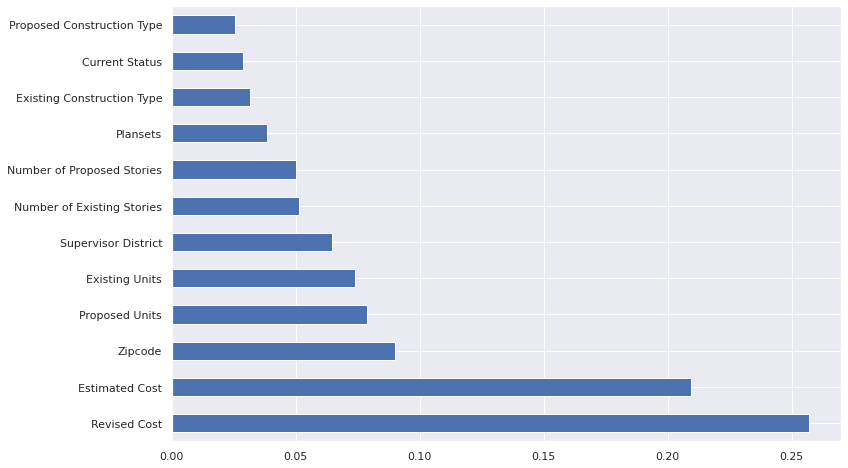

In [19]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=features.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [20]:
x=model_df.drop('Permit Type',axis=1)
y=model_df['Permit Type']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.3)

In [23]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [26]:
seed = 7
X_train, X_test, y_train, y_test = train_test_split(x_scal,y,test_size=0.3)
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

LR: 0.929046 (0.001448)
LDA: 0.926146 (0.001571)
CART: 0.913920 (0.002532)
NB: 0.142989 (0.050943)


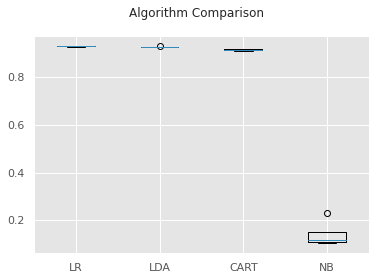

In [27]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=4)#, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [29]:
model_new = LogisticRegression()

In [30]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred,average='micro'))
    print("recall_score: ",recall_score(y_test, y_pred,average='micro'))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))

In [31]:
run_model(model_new,X_train, y_train, X_test, y_test)

pricison_score:  0.9307998975897005
recall_score:  0.9307998975897005
Accuracy = 0.9307998975897005
              precision    recall  f1-score   support

           1    0.77143   0.52941   0.62791        51
           2    0.66667   0.01130   0.02222       177
           3    0.57455   0.10384   0.17590      2783
           4    0.00000   0.00000   0.00000       688
           5    0.00000   0.00000   0.00000        30
           6    0.00000   0.00000   0.00000       124
           7    0.00000   0.00000   0.00000       102
           8    0.93423   0.99710   0.96464     50727

    accuracy                        0.93080     54682
   macro avg    0.36836   0.20521   0.22383     54682
weighted avg    0.89878   0.93080   0.90448     54682



In [32]:
y_pred=model_new.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,roc_curve
import math

In [34]:
mean_absolute_error(y_pred,y_test)

0.3161186496470502

In [35]:
mean_squared_error(y_pred,y_test)

1.5160747595186717

In [36]:
r2_score(y_pred,y_test)

-4.814880925376668

In [3]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [38]:
parameters={"max_depth" : [7,9,11],
           "min_samples_leaf":[6,7,8,9],
           'criterion':['gini','entropy'],
           "max_leaf_nodes":[None,10,20,30] }


In [39]:
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(model,param_grid=parameters,cv=3,verbose=77)

In [ ]:
tuning_model.fit(X_train,y_train)

In [ ]:
tuning_model.best_params_


In [ ]:
tuning_model.best_score_

In [24]:
model_best=RandomForestClassifier(criterion= 'entropy',max_depth= 11,max_leaf_nodes= None,min_samples_leaf= 7)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [26]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred,average='macro'))
    print("recall_score: ",recall_score(y_test, y_pred,average='macro'))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))

In [27]:
run_model(model_best,X_train, y_train, X_test, y_test)

pricison_score:  0.5536832471782405
recall_score:  0.3248829540914108
Accuracy = 0.9391755970886215
              precision    recall  f1-score   support

           1    0.93939   0.65957   0.77500        47
           2    0.89764   0.66667   0.76510       171
           3    0.77163   0.23515   0.36045      2845
           4    0.87879   0.04067   0.07775       713
           5    0.00000   0.00000   0.00000        25
           6    0.00000   0.00000   0.00000       113
           7    0.00000   0.00000   0.00000       103
           8    0.94202   0.99700   0.96873     50665

    accuracy                        0.93918     54682
   macro avg    0.55368   0.32488   0.36838     54682
weighted avg    0.92804   0.93918   0.92039     54682

[[   31     1     4     0     0     0     0    11]
 [    1   114    40     0     0     0     0    16]
 [    1     8   669     0     0     0     0  2167]
 [    0     0     0    29     0     0     0   684]
 [    0     2     7     0     0     0     0  

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


km = KMeans(n_clusters=3,)


model = [KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,SVC,KMeans,GaussianNB,LogisticRegression]

for mod in model:
    cls = mod()
    cls = cls.fit(X_train,y_train)
    print(mod , 'accuracy',cls.score(X_test,y_test))
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KMeans',KMeans(n_clusters=3)))  
models.append(('Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression()))

              
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result =cross_val_score(model,X_train,y_train,cv=kfold)
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> accuracy 0.9349145971251966
<class 'sklearn.tree._classes.DecisionTreeClassifier'> accuracy 0.9167367689550492
<class 'sklearn.ensemble._forest.RandomForestClassifier'> accuracy 0.9448813137778428
<class 'sklearn.svm._classes.SVC'> accuracy 0.9310010606781025
<class 'sklearn.cluster._kmeans.KMeans'> accuracy -251373.47594503258
<class 'sklearn.naive_bayes.GaussianNB'> accuracy 0.1701473976811382
<class 'sklearn.linear_model._logistic.LogisticRegression'> accuracy 0.929556343952306
KNN 0.9338506152519791
CART 0.9146328082138098
RF 0.9438827494317736
KMeans -109312.74692544571
Naive Bayes 0.1820989105729289
Logistic Regression 0.9295085821772867


In [31]:
from sklearn.ensemble import AdaBoostRegressor


In [32]:
boost = AdaBoostRegressor(n_estimators=100)
boost.fit(X_train,y_train)
print(boost.score(X_train,y_train))
print(boost.score(X_test,y_test))

-0.04884024517102059
-0.051272257682879685
